In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import pandas as pd


# Load the dataset
file_path = "building_violations_2019_to_present.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,_id,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,...,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location,geom_point_2249,geom_point_4326
0,3,V741124,1013,2024-02-14 15:06:00,Open,110.7,NaN,Periodic Inspections,463,NaN,...,NaN,CAMBRIDGE,MA,02138,11540.0,42.350930,-71.088211,"(42.35092955936467, -71.08821053015775)",0101000020C9080000FF7F2741EC6B2741BA80FA43EC87...,0101000020E61000002F8CC73DA5C551C0E2558242EB2C...
1,4,V741117,1013,2024-02-14 14:49:07,Open,1001.3.3,NaN,NaN,454,NaN,...,C/O GEORGE MAMAKOS,BOSTON,MA,02115,11490.0,42.351620,-71.087611,"(42.35161955885435, -71.08761052748115)",0101000020C90800007D83A3312E6D27419A56D0616A88...,0101000020E610000047942F699BC551C0EAF4A4DE012D...
2,5,V741114,1013,2024-02-14 14:27:35,Open,1001.3.2,NaN,Testing & Certification,108,NaN,...,NaN,MILTON LOWER MILL,MA,02187,90319.0,42.353140,-71.076811,"(42.35313954452243, -71.07681050027472)",0101000020C90800008341044FF7832741E8F8857D8689...,0101000020E6100000D6AA9676EAC451C0F75235AD332D...
3,6,V741111,1013,2024-02-14 14:12:33,Open,1001.3.2,NaN,Testing & Certification,401,NaN,...,NaN,BOSTON,MA,02115,167436.0,42.350472,-71.088478,"(42.350471929562474, -71.08847792164116)",0101000020C90800007F8AD14E5D6B2741C427DBB49887...,0101000020E61000007AF74C9FA9C551C084D1A143DC2C...
4,7,V741109,1013,2024-02-14 14:04:56,Open,1001.3.2,NaN,Testing & Certification,6,NaN,...,C/O LINDA J POLDOIAN,SUDBURY,MA,01776,168722.0,42.360209,-71.066605,"(42.36020935120114, -71.06660534861804)",0101000020C90800008053D1FF69992741E42F0C9B958E...,0101000020E61000006783144343C451C0A78F0B571B2E...


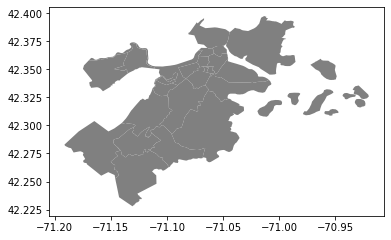

In [ ]:
# Start by importing the necessary packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

# for visualizations :
import seaborn as sns
import matplotlib.pyplot as plt


# Set the driver mode explicitly to 'r' (read)
gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'

# Read the shapefile
boston_map = gpd.read_file('Boston_Neighbor.shp')


boston_map.plot(color='grey')

# Show the plot
plt.show()

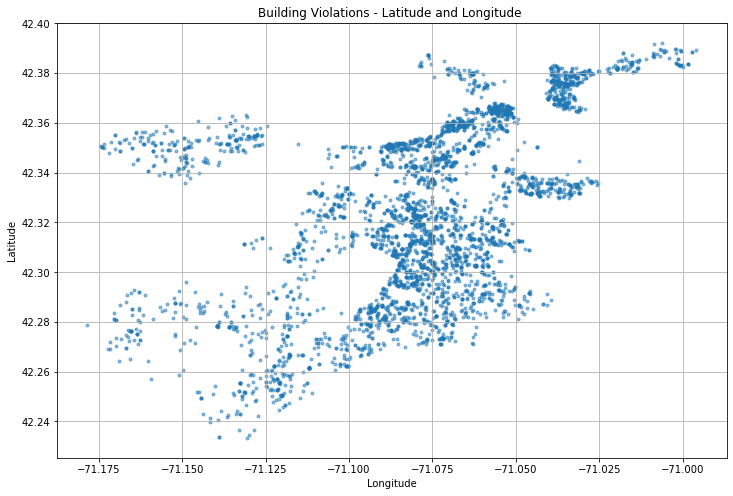

In [ ]:
# Now we will cerate a cluster plot based off the lattitude and longitude

# This is needed to remove an outlier
df_filtered = df[df['latitude'] >= 42]


# Plotting latitude and longitude points
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['longitude'], df_filtered['latitude'], alpha=0.5, marker='.')
plt.title('Building Violations - Latitude and Longitude ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

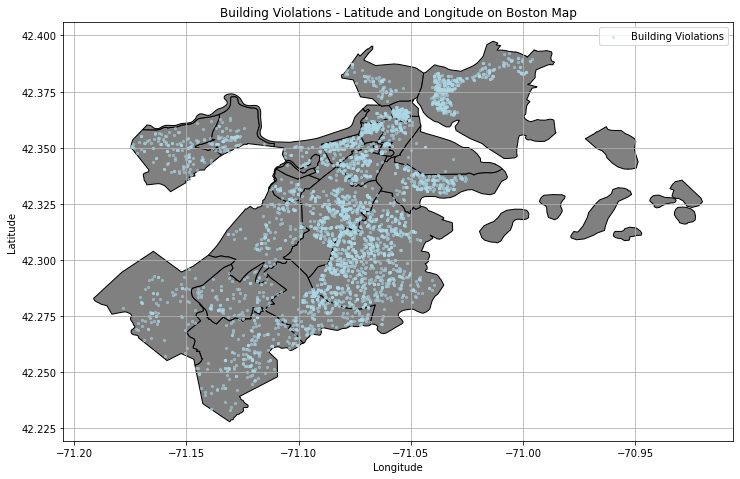

In [ ]:
# Start by importing the necessary packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers
df_filtered = df[df['latitude'] >= 42]

# Create a GeoDataFrame from latitude and longitude
geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]
geo_df = gpd.GeoDataFrame(df_filtered, crs=boston_map.crs, geometry=geometry)

# Plot the Boston map
ax = boston_map.plot(color='grey', edgecolor='black', figsize=(12, 8))

# Plot the building violations on the map
geo_df.plot(ax=ax, marker='o', color='lightblue', markersize=5, alpha=0.5, legend=True)

# Set plot title and axis labels
plt.title('Building Violations - Latitude and Longitude on Boston Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
plt.legend(['Building Violations'], loc='upper right')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

/Users/john/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


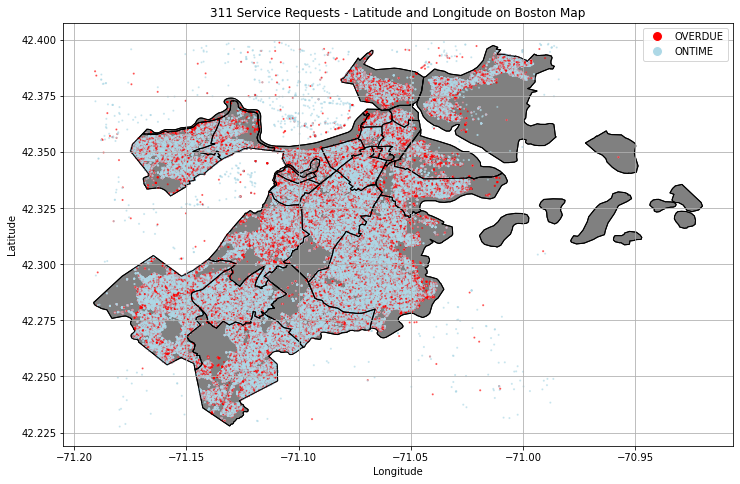

In [ ]:
# Start by importing the necessary packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Boston map shapefile
boston_map = gpd.read_file('Boston_Neighbor.shp')

# Read the CSV file containing latitude and longitude data
file_path = "311_2019_to_present.csv"
df = pd.read_csv(file_path)

# Remove outliers (assuming latitude and longitude values are within a reasonable range for Boston)
df_filtered = df[(df['latitude'] >= 42) & (df['longitude'] <= -70)]

# Define colors for points based on 'on_time' column
colors = np.where(df_filtered['on_time'] == 'OVERDUE', 'red', 'lightblue')

# Convert latitude and longitude to Points
geometry = [Point(xy) for xy in zip(df_filtered['longitude'], df_filtered['latitude'])]

# Create a GeoDataFrame from the DataFrame and the geometry
geo_df = gpd.GeoDataFrame(df_filtered, crs=boston_map.crs, geometry=geometry)

# Plot the Boston map with adjusted border color
ax = boston_map.plot(color='grey', edgecolor='black', figsize=(12, 8))

# Plot the latitude and longitude points on the map
geo_df.plot(ax=ax, marker='.', color=colors, markersize=5, alpha=0.5, legend=True)

# Plot the borders of the neighborhoods with light blue color
boston_map.plot(ax=ax, color='none', edgecolor='black')

# Set plot title and axis labels
plt.title('311 Service Requests - Latitude and Longitude on Boston Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend for the color coding
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='OVERDUE'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='ONTIME')],
           loc='upper right')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Load the dataset
file_path = "building_violations_2019_to_present.csv"
Build_Violations = pd.read_csv(file_path)

file_path2 = "PA_2019_to_present.csv"
P_Assesment = pd.read_csv(file_path2)

file_path3 = "SAM.csv"
SAM = pd.read_csv(file_path3)

/Users/john/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,6,12,13,16,17,18,19,20,26,29,30,31,32,35,36,37,38,39,40,41,42,48,49,50,51,52,53,54,55,56,57,58,60,62,63,64,66,72,73,74,79,80,81,82,83,84,85,86,87,89,90,91,92,93,95,99,100,103,104,105,109,110,111,112,113,114,115,117,118,119,121,122,124,125,127,129,130) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/john/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
print("Unique values in 'sam_id' column:", Build_Violations['sam_id'].unique())
print("Unique values in 'SAM' column:", SAM['SAM_ADDRESS_ID'].unique())

Unique values in 'sam_id' column: [ 11540.  11490.  90319. ...  22268. 148121.  21441.]
Unique values in 'SAM' column: [     1      2      4 ... 459598 459599 459600]


In [ ]:
merged_data_intermediete = pd.merge(Build_Violations, SAM, left_on='sam_id', right_on='SAM_ADDRESS_ID', how='inner')
merged_data = pd.merge(merged_data_intermediete, P_Assesment, left_on='PARCEL', right_on='PID', how='inner')

In [ ]:
merged_data = merged_data.dropna(subset=['YR_BUILT', 'YR_REMODEL'])

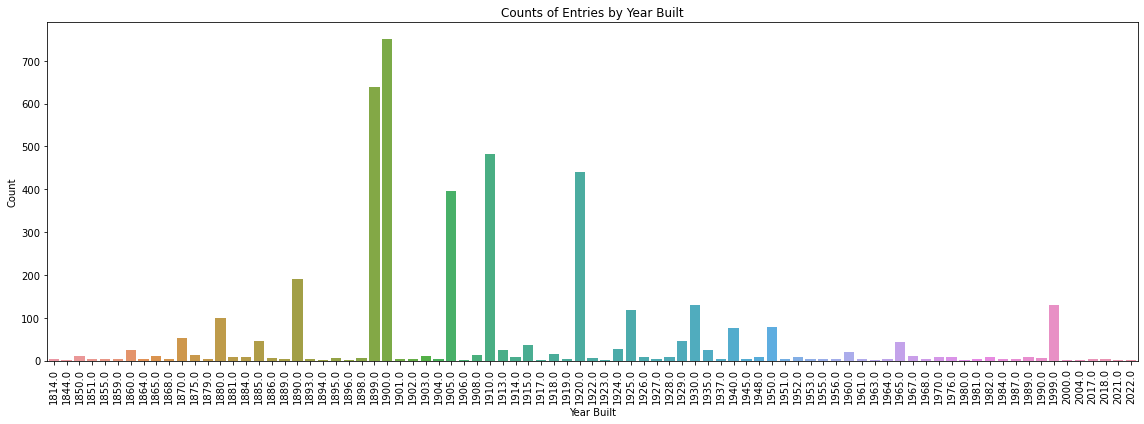

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(16, 6))  # Reduce the width to fit the rotated labels

# Plot for 'YR_BUILT' with rotated x-axis labels
sns.countplot(x='YR_BUILT', data=merged_data, ax=axes)
axes.set_title('Counts of Entries by Year Built')
axes.set_xlabel('Year Built')
axes.set_ylabel('Count')

# Rotate x-axis labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


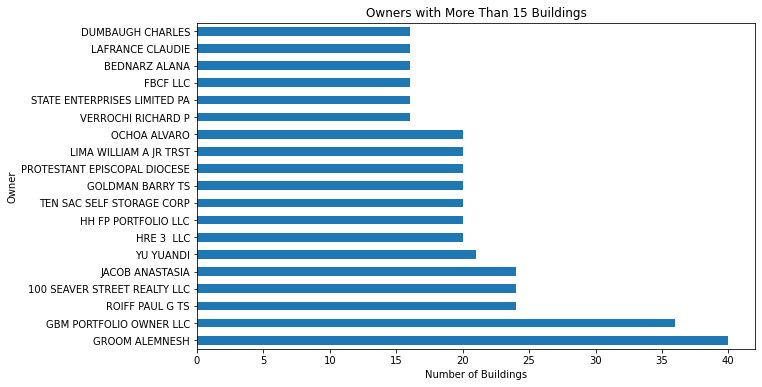

In [ ]:
# Count occurrences of each distinct owner
owner_counts = merged_data['OWNER'].value_counts()

# Filter owners with more than 10 buildings
owners_above_15 = owner_counts[owner_counts > 15]

# Plot the filtered data
plt.figure(figsize=(10, 6))
owners_above_15.plot(kind='barh')
plt.title('Owners with More Than 15 Buildings')
plt.xlabel('Number of Buildings')
plt.ylabel('Owner')
plt.show()

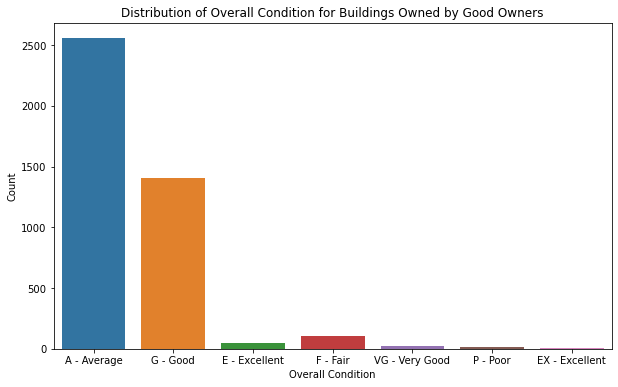

In [ ]:
# Get the overall condition for buildings not owned by bad owners
overall_condition = merged_data['OVERALL_COND']

# Plot the distribution of overall condition
plt.figure(figsize=(10, 6))
sns.countplot(x=overall_condition)
plt.title('Distribution of Overall Condition for Buildings Owned by Good Owners')
plt.xlabel('Overall Condition')
plt.ylabel('Count')
plt.show()